# 频率域滤波

频率域滤波的理论部分转到`傅里叶变换相关公式的推导.md`

了解了一些数学背景之后，现在来学习后续的知识。在上面的公式推导中，我们涉及到的是一维的傅里叶变换，一张图像其实可以看做是一个二维的信号，所以应该应用二维的傅里叶变换。

傅里叶变换的函数在numpy里面有提供，具体的实现方式暂且不管

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [5]:
np.info(np.fft)

Discrete Fourier Transform (:mod:`numpy.fft`)

.. currentmodule:: numpy.fft

Standard FFTs
-------------

.. autosummary::
   :toctree: generated/

   fft       Discrete Fourier transform.
   ifft      Inverse discrete Fourier transform.
   fft2      Discrete Fourier transform in two dimensions.
   ifft2     Inverse discrete Fourier transform in two dimensions.
   fftn      Discrete Fourier transform in N-dimensions.
   ifftn     Inverse discrete Fourier transform in N dimensions.

Real FFTs
---------

.. autosummary::
   :toctree: generated/

   rfft      Real discrete Fourier transform.
   irfft     Inverse real discrete Fourier transform.
   rfft2     Real discrete Fourier transform in two dimensions.
   irfft2    Inverse real discrete Fourier transform in two dimensions.
   rfftn     Real discrete Fourier transform in N dimensions.
   irfftn    Inverse real discrete Fourier transform in N dimensions.

Hermitian FFTs
--------------

.. autosummary::
   :toctree: generated/

   hfft 

下面是一维的傅里叶变换示意图

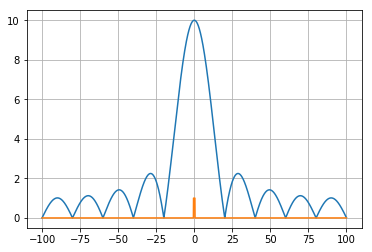

In [102]:
n = 2000
x = np.linspace(-100, 100, n)
y = np.zeros(n)
y[n // 2 - 5 : n // 2 + 5] = 1
# y = 1 / x * np.sin(x)
# plt.axis([-10, 10, -2, 2])
plt.plot(x, np.abs(np.fft.fftshift(np.fft.fft(y))), x, y), plt.grid(True)
plt.show()

下面用莱娜图得到她的傅里叶频谱

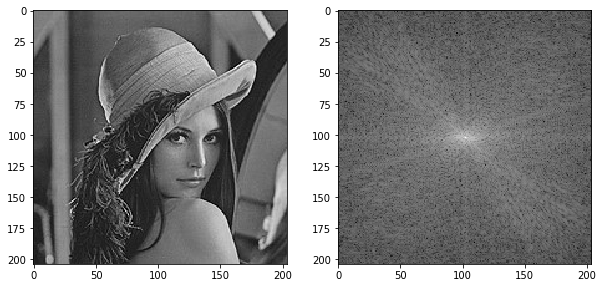

In [20]:
img = cv.imread('lena.jpg', 0)
plt.figure(figsize = (10, 5))
plt.subplot(121), plt.imshow(img, cmap = 'gray')
plt.subplot(122), plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(img)))**2), cmap = 'gray')
plt.show()

那么，逆傅里叶变换的结果是什么样的呢？

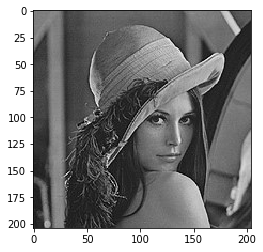

In [31]:
ft = np.fft.fft2(img)
reverse = np.fft.ifft2(ft).real
plt.imshow(reverse, cmap = 'gray')
plt.show()

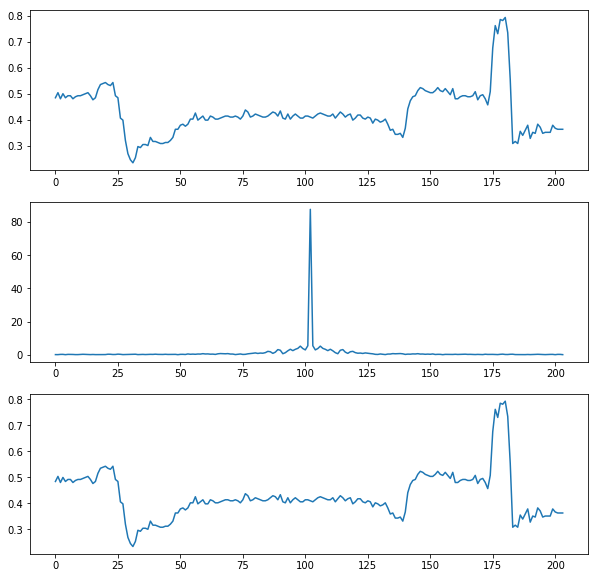

In [104]:
data = img[0, :] / 256
ft = np.fft.fft(data)
plt.figure(figsize = (10, 10))
plt.subplot(311), plt.plot(data)
plt.subplot(312), plt.plot(np.abs(np.fft.fftshift(ft)))
plt.subplot(313), plt.plot(np.fft.ifft(ft).real)
plt.show()

可以看到，上面经过傅里叶变换之后再逆变换得到的一维图像和二维图像都没有信息的丢失

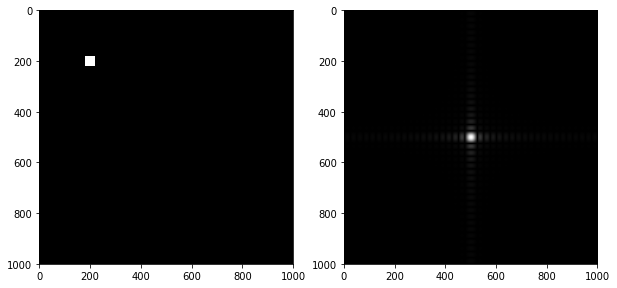

In [121]:
test = np.zeros((1000, 1000))
n = 20
center = 200
test[center - n : center + n, center - n : center + n] = 1.
ft = np.abs(np.fft.fftshift(np.fft.fft2(test)))
plt.figure(figsize = (10, 5))
plt.subplot(121), plt.imshow(test, cmap = 'gray')
plt.subplot(122), plt.imshow(ft, cmap = 'gray')
plt.show()